In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
def rpF(x, y):
    return (x/y)*np.exp(2*x) + y

In [10]:
def realY(x=0.25):
    return x*np.exp(x)

In [68]:
#Euler method(diffeq)
#IN: [a, b]- interval, N - num of splits, value0 - val of y(a);
#OUT: NODES - nodes, VALUES - values in nodes, deviation;

def mEU(a, b, N, value0=realY()):
    NODES = np.linspace(a, b, N+1)
    realNODES = np.linspace(a, b, 100)
    VALUES = np.empty(N+1)
    h, VALUES[0], deviation = (b - a)/N, value0, 0
    for i in range(N):
        VALUES[i+1] = VALUES[i] + h*rpF(NODES[i], VALUES[i])
        if deviation < abs(VALUES[i+1] - realY(NODES[i+1])): deviation = abs(VALUES[i+1] - realY(NODES[i+1]))
    return NODES, VALUES, deviation

In [69]:
#MODIFIED1 Euler method(diffeq)
#IN: [a, b]- interval, N - num of splits, value0 - val of y(a);
#OUT: NODES - nodes, VALUES - values in nodes, deviation;

def mEUM1(a, b, N, value0=realY()):
    NODES = np.linspace(a, b, N+1)
    realNODES = np.linspace(a, b, 100)
    VALUES = np.empty(N+1)
    h, VALUES[0], deviation = (b - a)/N, value0, 0
    for i in range(N):
        VALUES[i+1] = VALUES[i] + (0.5*h)*(rpF(NODES[i], VALUES[i]) + rpF(NODES[i]+h, VALUES[i]+h*rpF(NODES[i], VALUES[i])))
        if deviation < abs(VALUES[i+1] - realY(NODES[i+1])): deviation = abs(VALUES[i+1] - realY(NODES[i+1]))
    return NODES, VALUES, deviation

In [34]:
#MODIFIED2 Euler method(diffeq)
#IN: [a, b]- interval, N - num of splits, value0 - val of y(a);
#OUT: NODES - nodes, VALUES - values in nodes, deviation;

def mEUM2(a, b, N, value0=realY()):
    NODES = np.linspace(a, b, N+1)
    realNODES = np.linspace(a, b, 100)
    VALUES = np.empty(N+1)
    h, VALUES[0], deviation = (b - a)/N, value0, 0
    for i in range(N):
        VALUES[i+1] = VALUES[i] + h*rpF(NODES[i]+(0.5*h), VALUES[i]+(0.5*h)*rpF(NODES[i], VALUES[i]))
        if deviation < abs(VALUES[i+1] - realY(NODES[i+1])): deviation = abs(VALUES[i+1] - realY(NODES[i+1]))
    return NODES, VALUES, deviation

In [35]:
#Runge-Kutta method(diffeq)
##IN: [a, b]- interval, N - num of splits, value0 - val of y(a);
#OUT: NODES - nodes, VALUES - values in nodes, deviation;

def mRK(a, b, N, value0=realY()):
    NODES = np.linspace(a, b, N+1)
    realNODES = np.linspace(a, b, 100)
    VALUES = np.empty(N+1)
    h, VALUES[0], deviation = (b - a)/N, value0, 0
    for i in range(N):
        phi1 = h*rpF(NODES[i], VALUES[i])
        phi2 = h*rpF(NODES[i]+(0.5*h), VALUES[i]+(0.5*phi1))
        phi3 = h*rpF(NODES[i]+h, VALUES[i]-phi1+2*phi2)
        VALUES[i+1] = VALUES[i] + (phi1 + 4*phi2 + phi3)/6.0
        if deviation < abs(VALUES[i+1] - realY(NODES[i+1])): deviation = abs(VALUES[i+1] - realY(NODES[i+1]))
    return NODES, VALUES, deviation

In [116]:
def SHOW_T(a, b, N_from, N_to, N_jump):
    METHS = np.array([mEU, mEUM1, mEUM2, mRK])
    dataset = np.array([[meth(a, b, i)[2] for meth in METHS] for i in range(N_from, N_to, N_jump)])
    print(pd.DataFrame(dataset, 
                       index=["N="+str(i) for i in range(N_from, N_to, N_jump)], 
                       columns=[meth.__name__ for meth in METHS]
                      ))

In [149]:
def SHOW_G(a, b, N):
    METHS = np.array([mEU, mEUM1, mEUM2, mRK])
    dataset = np.array([meth(a, b, N)[2] for meth in METHS])
    X = np.linspace(a, b, 100)
    Y = realY(X)
    plt.plot(X, Y, label = "$y(x)$")
    for meth in METHS:
        RES = meth(a, b, N)
        plt.plot(RES[0], RES[1], label = meth.__name__)
    plt.grid(True)
    plt.axis([a, b, min(Y)-1, max(Y)+1])
    plt.legend()
    plt.show()
    print(pd.DataFrame(dataset, index=[meth.__name__ for meth in METHS], columns=["N="+str(N)]))

In [117]:
SHOW_T(0.25, 3, 2, 22, 4)

            mEU      mEUM1     mEUM2       mRK
N=2   31.457298  14.378363  9.532813  3.016283
N=6   18.941423   0.346354  2.045345  0.164856
N=10  12.950113   0.109894  0.832062  0.034677
N=14   9.847460   0.054767  0.446056  0.011583
N=18   7.946695   0.033379  0.277064  0.004996


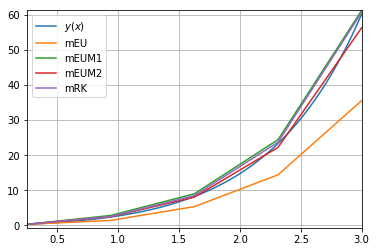

             N=4
mEU    24.679884
mEUM1   1.078260
mEUM2   3.919949
mRK     0.504886


In [152]:
SHOW_G(0.25, 3, 4)